<a href="https://colab.research.google.com/github/aysiacobb/CEE609_Project_Cobb/blob/main/Model_Training_609_chesapeake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chespeake Bay Project Code

#Data Preprocessing
Getting data cleaned up as well as subsetting data by year to narrow scope of the project.


In [ ]:
# Package install for all code
import pandas as pd

!pip install rasterio matplotlib

import rasterio
import matplotlib.pyplot as plt

import numpy as np

import geopandas as gpd
from shapely.geometry import Point

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Data downloaded directly from laptop

monitor_event = pd.read_csv('MonitorEvent.csv')

station = pd.read_csv('Station.csv')

water_quality = pd.read_csv('WaterQuality.csv', low_memory=False)

wq_plus = pd.read_csv('waterquality2.csv', low_memory=False)

In [3]:
water_quality.head()
wq_plus.head()

,CBSeg2003,EventId,Cruise,Program,Project,Agency,Source,Station,SampleDate,SampleTime,...,Unit,Method,Lab,Problem,PrecisionPC,BiasPC,Details,Latitude,Longitude,TierLevel
0,CB1TF,487674.0,BAY783,TWQM,MAIN,MDDNR,MDDNR,CB2.1,12/23/20,10:52:00,...,MG/L,F01,NaN,NaN,NaN,NaN,NaN,39.44149,-76.02599,T3
1,CB1TF,492900.0,BAY762,TWQM,MAIN,MDDNR,MDDNR,CB2.1,2/12/20,10:37:00,...,MG/L,F01,NaN,NaN,NaN,NaN,NaN,39.44149,-76.02599,T3
2,CB1TF,492900.0,BAY762,TWQM,MAIN,MDDNR,MDDNR,CB2.1,2/12/20,10:37:00,...,MG/L,F01,NaN,NaN,NaN,NaN,NaN,39.44149,-76.02599,T3
3,CB1TF,492900.0,BAY762,TWQM,MAIN,MDDNR,MDDNR,CB2.1,2/12/20,10:37:00,...,MG/L,F01,NaN,NaN,NaN,NaN,NaN,39.44149,-76.02599,T3
4,CB1TF,492900.0,BAY762,TWQM,MAIN,MDDNR,MDDNR,CB2.1,2/12/20,10:37:00,...,MG/L,F01,NaN,NaN,NaN,NaN,NaN,39.44149,-76.02599,T3


In [6]:
# Add a leading zero to single-digit years
water_quality['SampleDate'] = water_quality['SampleDate'].str.replace(r"(\d{1,2}/\d{1,2}/)(\d{1})(?!\d)", r"\g<1>0\2", regex=True)
wq_plus['SampleDate'] = wq_plus['SampleDate'].str.replace(r"(\d{1,2}/\d{1,2}/)(\d{1})(?!\d)", r"\g<1>0\2", regex=True)

# Convert the 'SampleDate' column to datetime format
water_quality['SampleDate'] = pd.to_datetime(water_quality['SampleDate'], format='%m/%d/%y', errors='coerce')

# Filter data from the year 2021
water_quality_2021 = water_quality[water_quality['SampleDate'].dt.year == 2021]

# Display the filtered 2021 data
print(water_quality_2021)

# Same conversions done for the additional data found stored in wq_plus
wq_plus['SampleDate'] = pd.to_datetime(wq_plus['SampleDate'], format='%m/%d/%y')
wq_plus_2021 = wq_plus[wq_plus['SampleDate'].dt.year == 2021]
print(wq_plus_2021)

wq_plus_2022 = wq_plus[wq_plus['SampleDate'].dt.year == 2022]
print(wq_plus_2022)


       CBSeg2003  EventId  Cruise Program Project Agency Source Station  \
665       CB1TF    588081  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
666       CB1TF    588082  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
667       CB1TF    588081  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
668       CB1TF    588082  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
669       CB1TF    588060  BAY789    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
...          ...      ...     ...     ...     ...    ...    ...     ...   
392516    CB5MH    588539  BAY804    TWQM    MAIN  VADEQ    ODU   CB5.4   
392517    CB5MH    588542  BAY804    TWQM    MAIN  VADEQ    ODU   CB5.5   
392518    CB5MH    588541  BAY804    TWQM    MAIN  VADEQ    ODU  CB5.4W   
392519    CB5MH    588539  BAY804    TWQM    MAIN  VADEQ    ODU   CB5.4   
392520    CB5MH    588539  BAY804    TWQM    MAIN  VADEQ    ODU   CB5.4   

       SampleDate SampleTime  ...  Unit  Method  Lab  Problem PrecisionPC  \
665    2021-02-10   11

In [7]:
# Filter data from the year 2022
water_quality_2022 = water_quality[water_quality['SampleDate'].dt.year == 2022]

# Display the filtered 2022 data
print(water_quality_2022)

       CBSeg2003  EventId  Cruise Program Project Agency Source Station  \
778       CB1TF    611565  BAY810    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
779       CB1TF    611566  BAY810    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
780       CB1TF    611565  BAY810    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
781       CB1TF    611566  BAY810    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
782       CB1TF    611582  BAY812    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
...          ...      ...     ...     ...     ...    ...    ...     ...   
393056    CB5MH    624745  BAY826    TWQM    MAIN  MDDNR  MDDNR   CB5.1   
393057    CB5MH    624745  BAY826    TWQM    MAIN  MDDNR  MDDNR   CB5.1   
393058    CB5MH    624745  BAY826    TWQM    MAIN  MDDNR  MDDNR   CB5.1   
393059    CB5MH    624746  BAY826    TWQM    MAIN  MDDNR  MDDNR   CB5.2   
393060    CB5MH    624745  BAY826    TWQM    MAIN  MDDNR  MDDNR   CB5.1   

       SampleDate SampleTime  ...  Unit  Method  Lab  Problem PrecisionPC  \
778    2022-02-09   10

In [8]:
# Combine 2021 and 2022 water quality data
combined_water_quality = pd.concat([water_quality_2021, water_quality_2022], ignore_index=True)

# Combining additional wq paramters from wq_plus into combined_water_quality
combined_water_quality = pd.concat([combined_water_quality, wq_plus_2021, wq_plus_2022], ignore_index=True)

# Display the combined data
print(combined_water_quality)

      CBSeg2003   EventId  Cruise Program   Project Agency Source   Station  \
0        CB1TF   588081.0  BAY786    TWQM      MAIN  MDDNR  MDDNR     CB1.1   
1        CB1TF   588082.0  BAY786    TWQM      MAIN  MDDNR  MDDNR     CB2.1   
2        CB1TF   588081.0  BAY786    TWQM      MAIN  MDDNR  MDDNR     CB1.1   
3        CB1TF   588082.0  BAY786    TWQM      MAIN  MDDNR  MDDNR     CB2.1   
4        CB1TF   588060.0  BAY789    TWQM      MAIN  MDDNR  MDDNR     CB2.1   
...         ...       ...     ...     ...       ...    ...    ...       ...   
42057    CB8PH   620348.0  BAY815    TWQM      MAIN  VADEQ    ODU    CB8.1E   
42058    CB8PH   620347.0  BAY812    TWQM      MAIN  VADEQ    ODU    CB8.1E   
42059    CB8PH   620344.0  BAY815    TWQM      MAIN  VADEQ    ODU     CB7.4   
42060    CB8PH   620343.0  BAY812    TWQM      MAIN  VADEQ    ODU     CB7.4   
42061    CB8PH   629780.0  PART22    TWQM  PARTTRIB    CMC   PVMN  PVMN.HB3   

      SampleDate SampleTime  ...  Unit  Method  Lab

In [9]:
# Checking na values in water quality df
combined_water_quality.isna().sum()

,0
CBSeg2003,0
EventId,0
Cruise,2281
Program,0
Project,0
Agency,0
Source,0
Station,0
SampleDate,0
SampleTime,0


# Preliminary Visualizations
## Prelminary visulations include genertaing figures for the LANDSAT imagery bands.

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


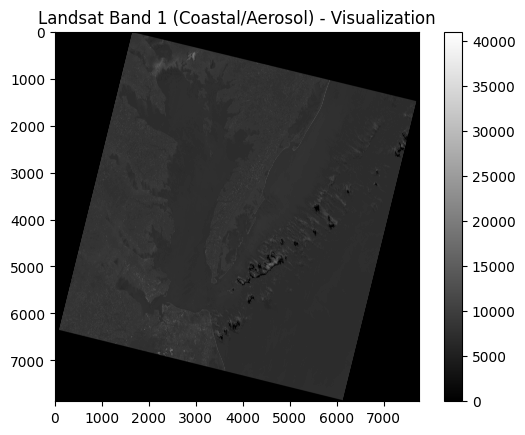

In [12]:
#Landsat Imagery Band 1
#1
band1_file = '/content/drive/MyDrive/tiff/2022_04_B1.TIF'

with rasterio.open(band1_file) as src:
    band1 = src.read(1)  # Read the SWIR band

plt.imshow(band1, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 1 (Coastal/Aerosol) - Visualization')
plt.show()

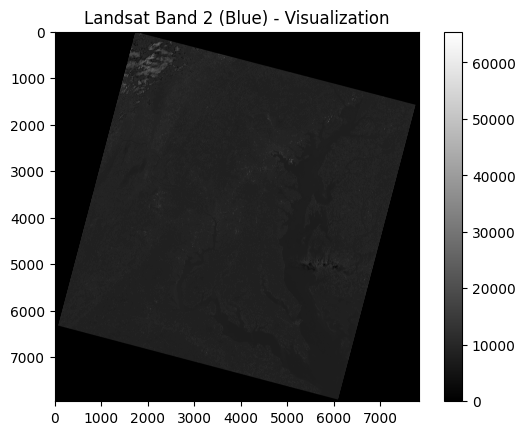

In [13]:
#Landsat Imagery Band 2
band2_file = '/content/drive/MyDrive/tiff/2021_12_B2.TIF'

with rasterio.open(band2_file) as src:
    band2 = src.read(1)  # Read the SWIR band

plt.imshow(band2, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 2 (Blue) - Visualization')
plt.show()

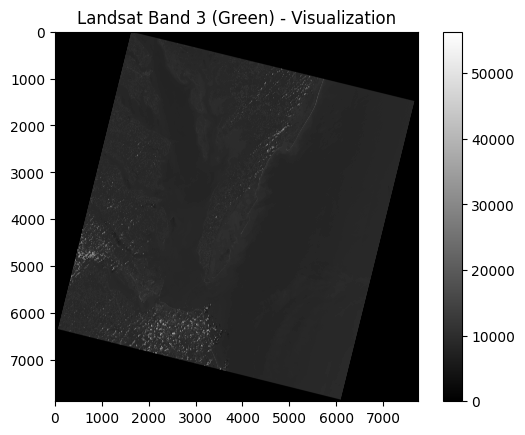

In [14]:
#Landsat Imagery Band 3
#3
band3_file = '/content/drive/MyDrive/tiff/2022_07_B3.TIF'

with rasterio.open(band3_file) as src:
    band3 = src.read(1)  # Read the SWIR band

plt.imshow(band3, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 3 (Green) - Visualization')
plt.show()


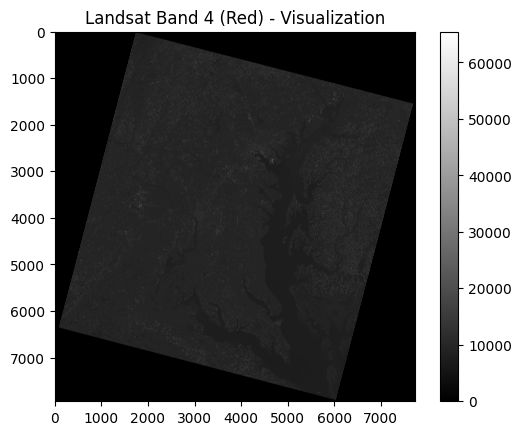

In [15]:
# Landsat Imagery Bands 4

band4_file = '/content/drive/MyDrive/tiff/2021_11_B4.TIF'

with rasterio.open(band4_file) as src:
    band4 = src.read(1)  # Read the Red band

# Plot the band
plt.imshow(band4, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 4 (Red) - Visualization')
plt.show()


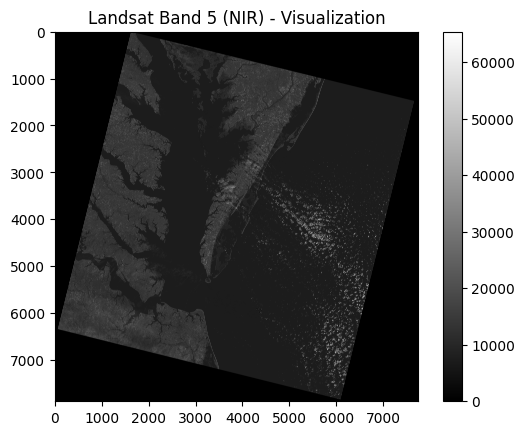

In [16]:
#Landsat Imagery Band 5
band5_file = '/content/drive/MyDrive/tiff/2022_12_B5.TIF'

with rasterio.open(band5_file) as src:
    band5 = src.read(1)  # Read the SWIR band

plt.imshow(band5, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 5 (NIR) - Visualization')
plt.show()

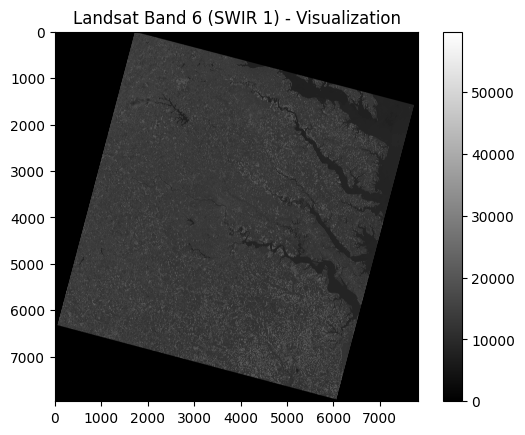

In [17]:
#Landsat Imagery Band 6
band6_file = '/content/drive/MyDrive/tiff/2021_04_B6.TIF'

with rasterio.open(band6_file) as src:
    band6 = src.read(1)  # Read the SWIR band

plt.imshow(band6, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 6 (SWIR 1) - Visualization')
plt.show()

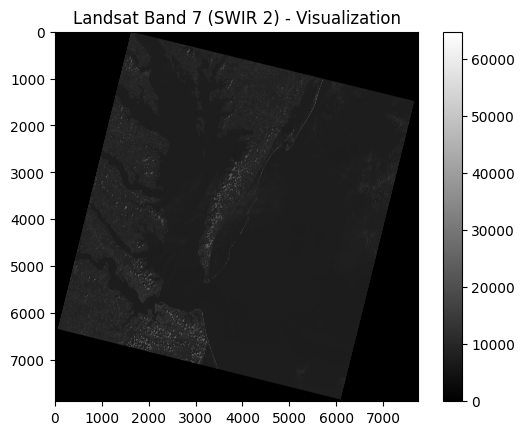

In [18]:
#Landsat Imagery Band 7
band7_file = '/content/drive/MyDrive/tiff/2021_08_B7.TIF'

with rasterio.open(band7_file) as src:
    band7 = src.read(1)  # Read the SWIR 2 band

plt.imshow(band7, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 7 (SWIR 2) - Visualization')
plt.show()

In [19]:
print(band4.shape)
print(band5.shape)

(7941, 7741)
(7881, 7751)


<ipython-input-20-32fd18163743>:8: RuntimeWarning: invalid value encountered in divide
  NDVI = (band5_resized - band4) / (band5_resized + band4)


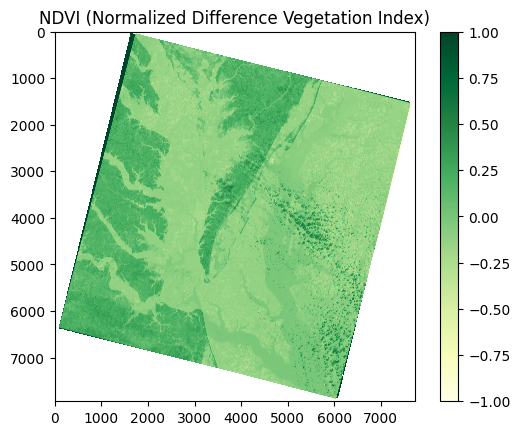

In [20]:
# NDVI
band3 = band3.astype(np.float32)
band5 = band5.astype(np.float32)

from skimage.transform import resize

# Resize band5 (NIR) to match the shape of band4 (Red)
band5_resized = resize(band5, band4.shape, mode='constant', preserve_range=True)

NDVI = (band5_resized - band4) / (band5_resized + band4)

# Plot the NDVI
plt.imshow(NDVI, cmap='YlGn')
plt.colorbar()
plt.title('NDVI (Normalized Difference Vegetation Index)')
plt.show()


Shape of Green Band (Band 3): (7881, 7751)
Shape of NIR Band (Band 5): (7881, 7751)


<ipython-input-22-ec3185584779>:11: RuntimeWarning: invalid value encountered in divide
  NDWI = (band3 - band5) / (band3 + band5)


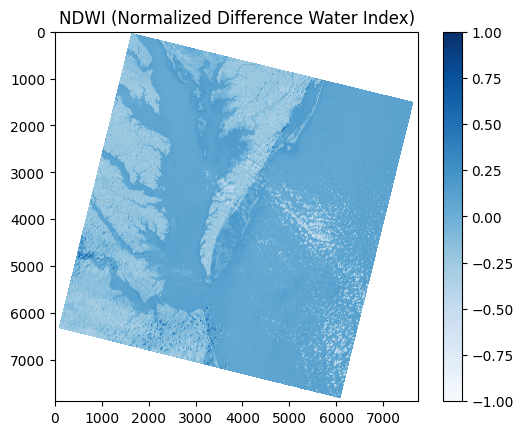

In [22]:
# NDWI
print(f"Shape of Green Band (Band 3): {band3.shape}")
print(f"Shape of NIR Band (Band 5): {band5.shape}")

from skimage.transform import resize

if band3.shape != band5.shape:
    band5 = resize(band5, band3.shape, mode='constant', preserve_range=True)

# Calculate NDWI
NDWI = (band3 - band5) / (band3 + band5)

# Plot NDWI
plt.imshow(NDWI, cmap='Blues')  # Use a blue colormap for water
plt.colorbar()
plt.title('NDWI (Normalized Difference Water Index)')
plt.show()

In [100]:
from skimage.transform import resize
import numpy as np

# Resize NDVI to match the shape of NDWI (or vice versa)
if NDWI.shape != NDVI.shape:
    NDVI_resized = resize(NDVI, NDWI.shape, mode='constant', preserve_range=True)

# Combine the arrays
satellite_data = NDWI + NDVI_resized

# Relating In-Situ Measurements to Satellite Data

## This section focuses on converting in-situ data to match satellite data. This also includes preliminary visualizations of water quality points on landsat imagery.

In [23]:
# Creating GeoDataFrame for combined_water_quality DataFrame
combined_water_quality['geometry'] = combined_water_quality.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Converting DataFrame to a GeoDataFrame
combined_gdf = gpd.GeoDataFrame(combined_water_quality, geometry='geometry', crs="EPSG:4326")

# Display the first few rows
print(combined_gdf.head())

  CBSeg2003   EventId  Cruise Program Project Agency Source Station  \
0    CB1TF   588081.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
1    CB1TF   588082.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
2    CB1TF   588081.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
3    CB1TF   588082.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
4    CB1TF   588060.0  BAY789    TWQM    MAIN  MDDNR  MDDNR   CB2.1   

  SampleDate SampleTime  ...  Method  Lab  Problem  PrecisionPC BiasPC  \
0 2021-02-10   11:17:00  ...    L01   CBL      NaN          NaN    NaN   
1 2021-02-10   10:37:00  ...    L01   CBL      NaN          NaN    NaN   
2 2021-02-10   11:17:00  ...    L01   CBL      NaN          NaN    NaN   
3 2021-02-10   10:37:00  ...    L01   CBL      NaN          NaN    NaN   
4 2021-03-18   14:39:00  ...    L01   CBL      NaN          NaN    NaN   

  Details  Latitude Longitude TierLevel                    geometry  
0     NaN  39.54794 -76.08481        T3  POINT (-76.08481 

In [24]:
# Check CRS of the GeoDataFrame (WQ data)
print(combined_gdf.crs)

# Reproject WQ data to match CRS of the raster
with rasterio.open(band5_file) as src:
    raster_crs = src.crs
combined_gdf = combined_gdf.to_crs(raster_crs)

EPSG:4326


In [91]:
# Load the NIR band raster as an example
with rasterio.open(band5_file) as src:
    # Read the raster data and transform
    band5 = src.read(1)
    transform = src.transform

# Extract values for each point
    def extract_raster_value(row, src, band):
        x, y = row['geometry'].x, row['geometry'].y  # Point coordinates
        row, col = src.index(x, y)  # Convert coordinates to row and col
        try:
            value = band[row, col]
            return value
        except IndexError:  # If the point is outside the raster bounds
            return np.nan

# Apply function to extract raster values for each point in the GeoDataFrame
    combined_gdf['Band5_Value'] = combined_gdf.apply(lambda row: extract_raster_value(row, src, band5), axis=1)

combined_gdf['NDVI'] = combined_gdf.apply(lambda row: extract_raster_value(row, src, NDVI), axis=1)


In [27]:
with rasterio.open(band5_file) as src:
    combined_gdf = combined_gdf.to_crs(src.crs)

print(combined_gdf.head())  # Check a few rows for geometry and coordinates
print(src.bounds)           # Check the raster bounds

  CBSeg2003   EventId  Cruise Program Project Agency Source Station  \
0    CB1TF   588081.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
1    CB1TF   588082.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
2    CB1TF   588081.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
3    CB1TF   588082.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
4    CB1TF   588060.0  BAY789    TWQM    MAIN  MDDNR  MDDNR   CB2.1   

  SampleDate SampleTime  ...  Problem  PrecisionPC  BiasPC  Details  Latitude  \
0 2021-02-10   11:17:00  ...      NaN          NaN     NaN      NaN  39.54794   
1 2021-02-10   10:37:00  ...      NaN          NaN     NaN      NaN  39.44149   
2 2021-02-10   11:17:00  ...      NaN          NaN     NaN      NaN  39.54794   
3 2021-02-10   10:37:00  ...      NaN          NaN     NaN      NaN  39.44149   
4 2021-03-18   14:39:00  ...      NaN          NaN     NaN      NaN  39.44149   

  Longitude TierLevel                        geometry Band5_Value      NDVI  
0 -76.08

In [28]:
# Check a few rows of transformed points
print(combined_gdf[['Latitude', 'Longitude', 'geometry']].head())

# Check raster bounds for reference
with rasterio.open(band5_file) as src:
    print(src.bounds)

   Latitude  Longitude                        geometry
0  39.54794  -76.08481  POINT (406792.147 4378146.808)
1  39.44149  -76.02599  POINT (411711.555 4366273.282)
2  39.54794  -76.08481  POINT (406792.147 4378146.808)
3  39.44149  -76.02599  POINT (411711.555 4366273.282)
4  39.44149  -76.02599  POINT (411711.555 4366273.282)
BoundingBox(left=316785.0, bottom=4028985.0, right=549315.0, top=4265415.0)


In [29]:
# Ensure all points are reprojected correctly
combined_gdf = combined_gdf.to_crs("EPSG:32618")

In [30]:
# Filter points within raster bounds
within_bounds = combined_gdf[
    (combined_gdf['geometry'].x >= src.bounds.left) &
    (combined_gdf['geometry'].x <= src.bounds.right) &
    (combined_gdf['geometry'].y >= src.bounds.bottom) &
    (combined_gdf['geometry'].y <= src.bounds.top)
]


In [31]:
# List of file paths for Landsat bands
band_files = [band1_file, band2_file, band3_file, band4_file, band5_file, band6_file, band7_file]

for band_file in band_files:
    with rasterio.open(band_file) as src:
        # Read the raster and check bounds
        bounds = src.bounds
        print(f"Bounds for {band_file}: {bounds}")

        # Filter points within the raster bounds
        points_within_bounds = combined_gdf[
            (combined_gdf['geometry'].x >= bounds.left) &
            (combined_gdf['geometry'].x <= bounds.right) &
            (combined_gdf['geometry'].y >= bounds.bottom) &
            (combined_gdf['geometry'].y <= bounds.top)
        ]

Bounds for /content/drive/MyDrive/tiff/2022_04_B1.TIF: BoundingBox(left=313185.0, bottom=4029285.0, right=545715.0, top=4265415.0)
Bounds for /content/drive/MyDrive/tiff/2021_12_B2.TIF: BoundingBox(left=220485.0, bottom=4187985.0, right=455415.0, top=4426515.0)
Bounds for /content/drive/MyDrive/tiff/2022_07_B3.TIF: BoundingBox(left=317385.0, bottom=4028985.0, right=549915.0, top=4265415.0)
Bounds for /content/drive/MyDrive/tiff/2021_11_B4.TIF: BoundingBox(left=232785.0, bottom=4187985.0, right=465015.0, top=4426215.0)
Bounds for /content/drive/MyDrive/tiff/2022_12_B5.TIF: BoundingBox(left=316785.0, bottom=4028985.0, right=549315.0, top=4265415.0)
Bounds for /content/drive/MyDrive/tiff/2021_04_B6.TIF: BoundingBox(left=175785.0, bottom=4030185.0, right=410715.0, top=4269015.0)
Bounds for /content/drive/MyDrive/tiff/2021_08_B7.TIF: BoundingBox(left=317685.0, bottom=4028985.0, right=550215.0, top=4265415.0)


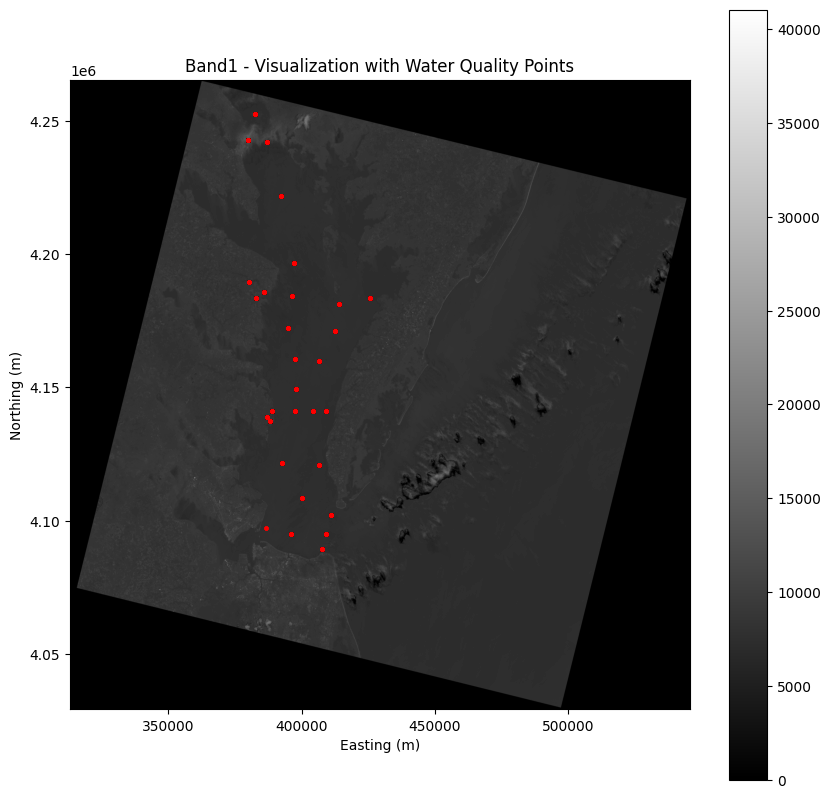

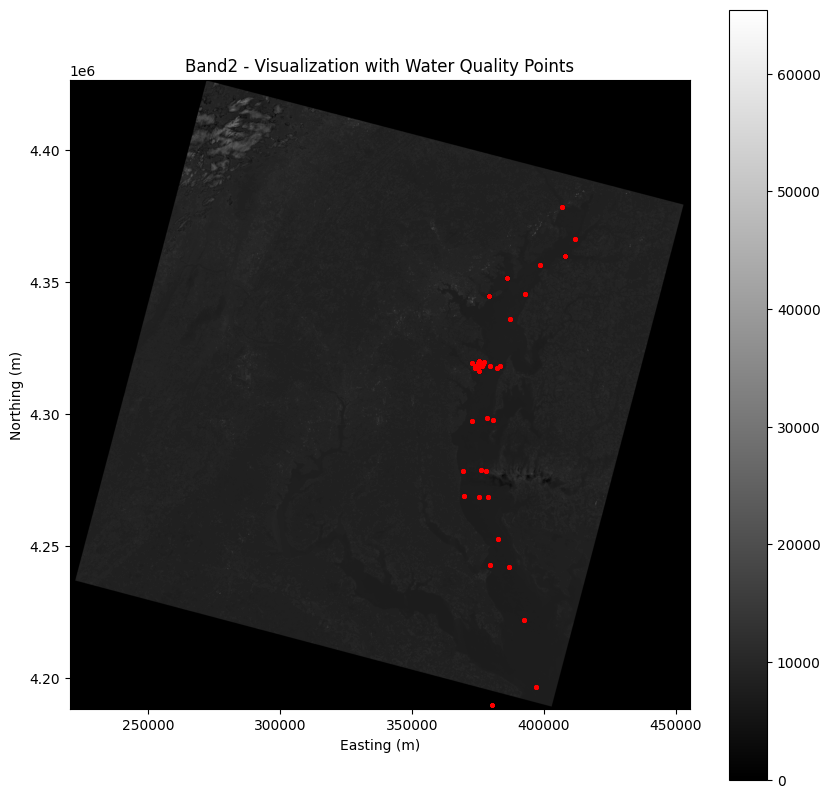

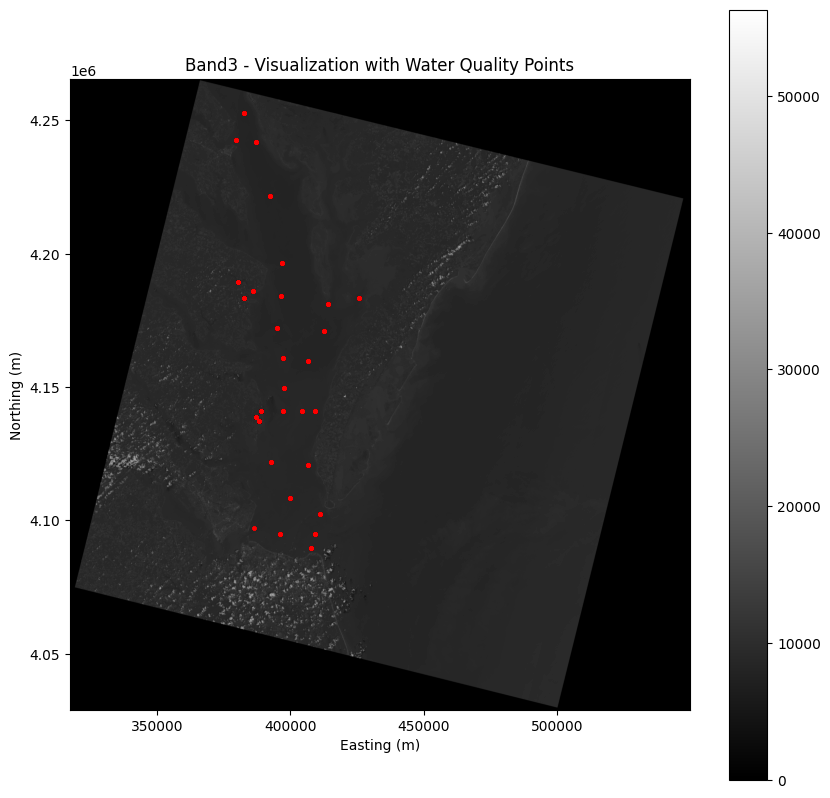

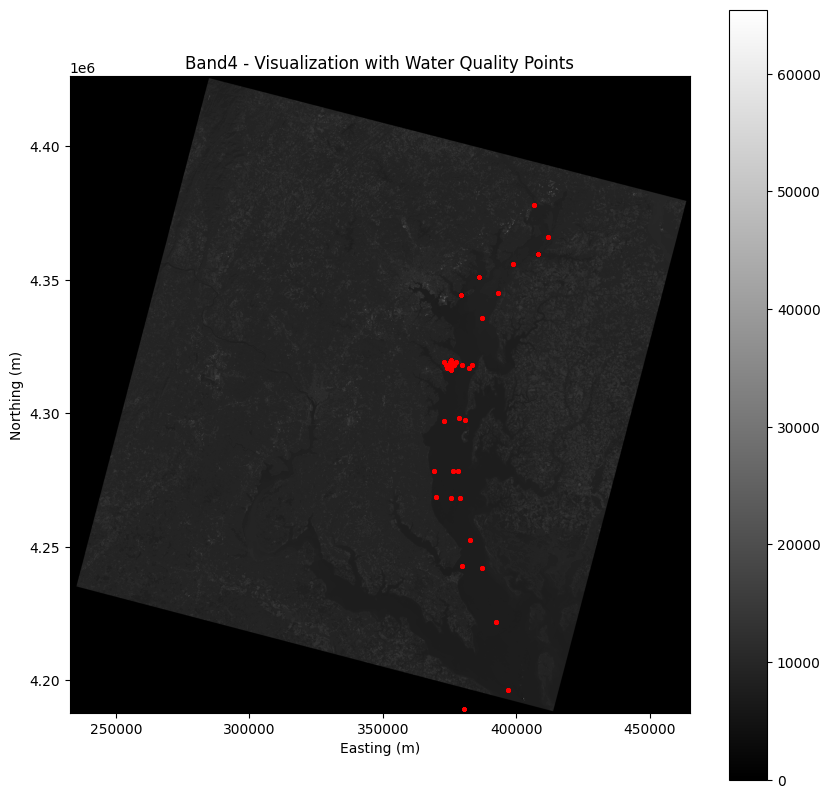

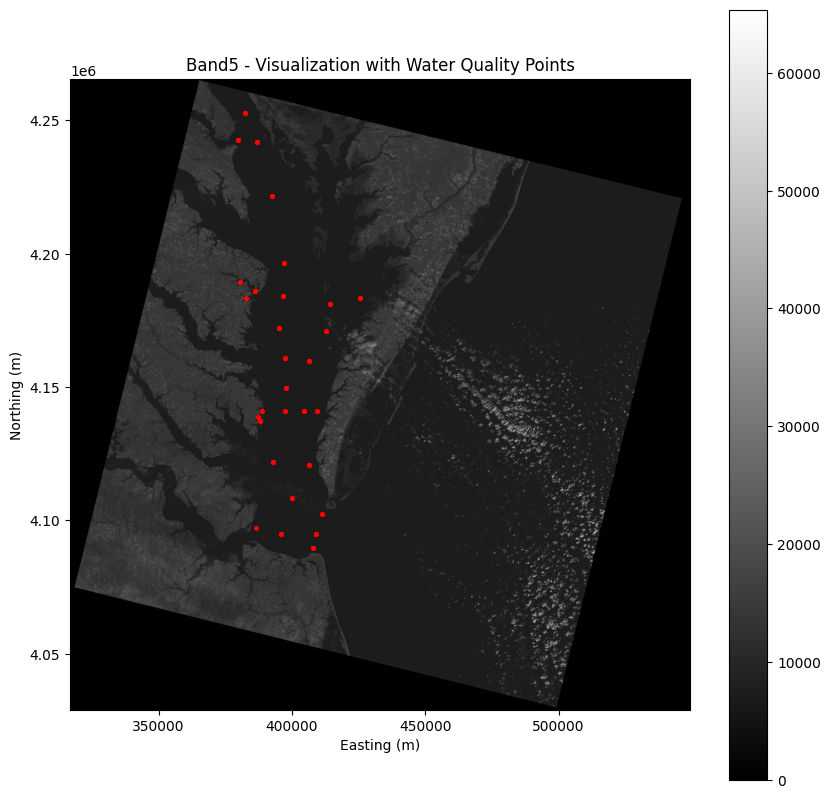

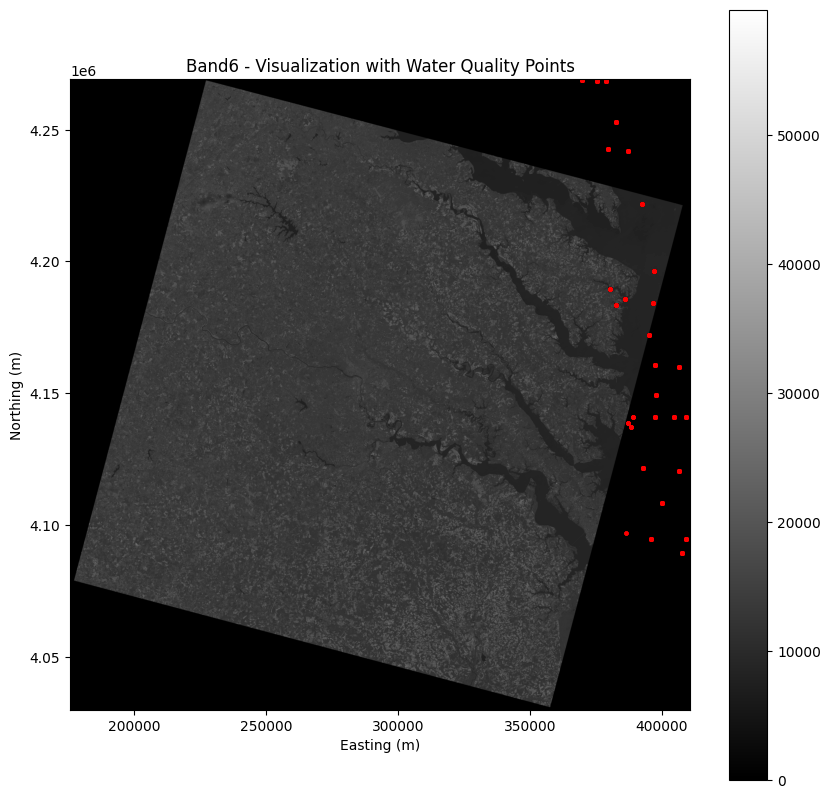

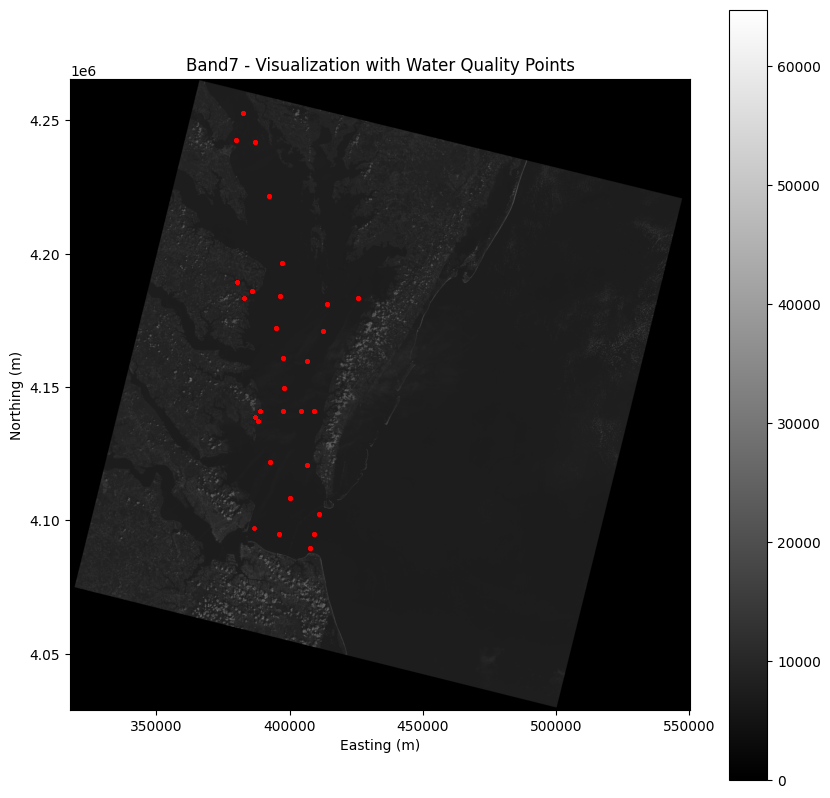

In [32]:
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd

# List of file paths for Landsat bands with their names for easy reference
band_files = {
    'Band1': '/content/drive/MyDrive/tiff/2022_04_B1.TIF',
    'Band2': '/content/drive/MyDrive/tiff/2021_12_B2.TIF',
    'Band3': '/content/drive/MyDrive/tiff/2022_07_B3.TIF',
    'Band4': '/content/drive/MyDrive/tiff/2021_11_B4.TIF',
    'Band5': '/content/drive/MyDrive/tiff/2022_12_B5.TIF',
    'Band6': '/content/drive/MyDrive/tiff/2021_04_B6.TIF',
    'Band7': '/content/drive/MyDrive/tiff/2021_08_B7.TIF'
}

for band_name, band_file in band_files.items():
    with rasterio.open(band_file) as src:
        # Read the raster data
        band_array = src.read(1)
        bounds = src.bounds

        # Filter points within the raster bounds
        points_within_bounds = combined_gdf[
            (combined_gdf['geometry'].x >= bounds.left) &
            (combined_gdf['geometry'].x <= bounds.right) &
            (combined_gdf['geometry'].y >= bounds.bottom) &
            (combined_gdf['geometry'].y <= bounds.top)
        ]

        # Plot raster with filtered points
        plt.figure(figsize=(10, 10))
        plt.imshow(band_array, cmap='gray', extent=(bounds.left, bounds.right, bounds.bottom, bounds.top))
        plt.colorbar()
        plt.title(f'{band_name} - Visualization with Water Quality Points')

        # Overlay filtered GeoDataFrame points
        points_within_bounds.plot(ax=plt.gca(), color='red', markersize=5, alpha=0.6)
        plt.xlabel('Easting (m)')
        plt.ylabel('Northing (m)')
        plt.show()

# Model Training
# This section focuses on model training and assessing the model fit / accuracy of only the in-situ measurements

In [33]:
# Pivot the data so each parameter becomes a separate column
reshaped_data = combined_gdf.pivot_table(
    index=['CBSeg2003', 'EventId', 'Station', 'SampleDate', 'SampleTime', 'Latitude', 'Longitude', 'geometry'],
    columns='Parameter',
    values='MeasureValue'
).reset_index()

reshaped_data = reshaped_data.drop_duplicates()

# Display the first few rows of reshaped data
print(reshaped_data.head())

# Rename columns if necessary for easier access (optional)
reshaped_data.columns.name = None

Parameter CBSeg2003   EventId Station SampleDate SampleTime  Latitude  \
0            CB1TF   588001.0   CB1.1 2021-01-13   11:37:00  39.54794   
1            CB1TF   588002.0   CB2.1 2021-01-13   11:00:00  39.44149   
2            CB1TF   588015.0   CB1.1 2021-04-07   11:23:00  39.54794   
3            CB1TF   588016.0   CB2.1 2021-04-07   10:46:00  39.44149   
4            CB1TF   588037.0   CB1.1 2021-05-12   11:18:00  39.54794   

Parameter  Longitude                        geometry    CHLA         DO  \
0          -76.08481  POINT (406792.147 4378146.808)   0.737  13.600000   
1          -76.02599  POINT (411711.555 4366273.282)   0.844  13.185714   
2          -76.08481  POINT (406792.147 4378146.808)  10.235  11.520000   
3          -76.02599  POINT (411711.555 4366273.282)  10.502  11.766667   
4          -76.08481  POINT (406792.147 4378146.808)  13.617  10.880000   

Parameter      KD        PH      TN       TP  TURB_NTU      WTEMP  
0          1.4486  7.916667  1.8588  0.024

In [149]:
# Step 1: Updated predictors and predictands

predictors_insitu = ['PH', 'TN', 'TP', 'WTEMP', 'DO', 'KD', 'TURB_NTU']
predictands_insitu = ['CHLA']  # Predicting CHLA

# Select only numeric columns for filling missing values
numeric_columns = reshaped_data[predictors_insitu + predictands_insitu].select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with their mean
for column in numeric_columns:
    reshaped_data[column] = reshaped_data[column].fillna(reshaped_data[column].mean())

# Filter out rows with remaining missing values (if any)
data = reshaped_data[predictors_insitu + predictands_insitu].dropna()

# Check the shape of the dataset after handling missing values
print("Shape of dataset after handling missing values:", data.shape)

# Proceed with splitting predictors and predictands
X = data[predictors_insitu]
y_chla = data['CHLA']


# Normalize predictors using Z-score normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


Shape of dataset after handling missing values: (1582, 8)


In [35]:
# Step 2: Train-Test Split for CHLA
X_train_chla, X_test_chla, y_train_chla, y_test_chla = train_test_split(
    X_normalized, y_chla, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Model for CHLA
rf_chla = RandomForestRegressor(random_state=42)
rf_chla.fit(X_train_chla, y_train_chla)


RandomForestRegressor(random_state=42)

In [150]:
# Step 4: Evaluate Model for CHLA
y_pred_chla = rf_chla.predict(X_test_chla)
mae_chla = mean_absolute_error(y_test_chla, y_pred_chla)
rmse_chla = np.sqrt(mean_squared_error(y_test_chla, y_pred_chla))
r2_chla = r2_score(y_test_chla, y_pred_chla)

print("Chlorophyll-a Model Performance (CHLA):")
print(f"MAE: {mae_chla:.4f}, RMSE: {rmse_chla:.4f}, R2 Score: {r2_chla:.4f}")
print("Feature Importances (CHLA Model):", rf_chla.feature_importances_)

Chlorophyll-a Model Performance (CHLA):
MAE: 1.3178, RMSE: 3.4251, R2 Score: 0.5291
Feature Importances (CHLA Model): [2.29972211e-01 2.77699849e-01 1.15208148e-01 1.57505190e-01
 1.13295165e-01 1.06319435e-01 1.28757561e-16]


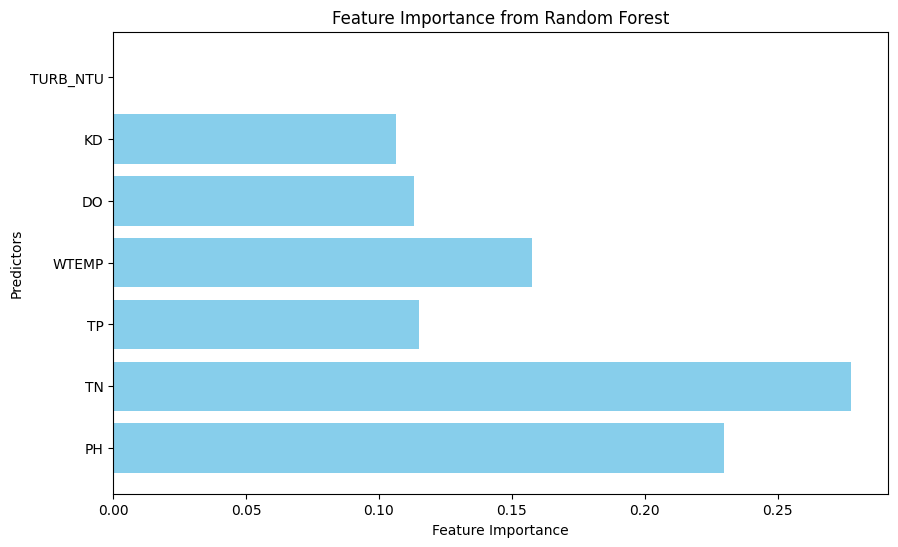

In [151]:
# Get feature importances
importances_insitu = rf_chla.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(predictors_insitu, importances_insitu, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Predictors')
plt.title('Feature Importance from Random Forest')
plt.show()

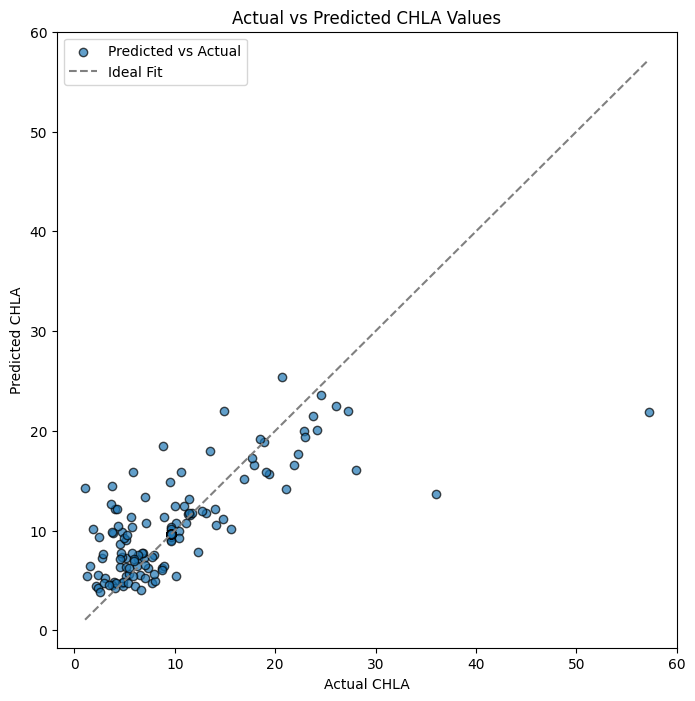

In [37]:
# Step 5: Plotting Actual vs Predicted Values
# CHLA
plt.figure(figsize=(8, 8))
plt.scatter(y_test_chla, y_pred_chla, alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.plot([min(y_test_chla), max(y_test_chla)], [min(y_test_chla), max(y_test_chla)], '--', color='gray', label='Ideal Fit')
plt.xlabel('Actual CHLA')
plt.ylabel('Predicted CHLA')
plt.title('Actual vs Predicted CHLA Values')
plt.legend()
plt.show()


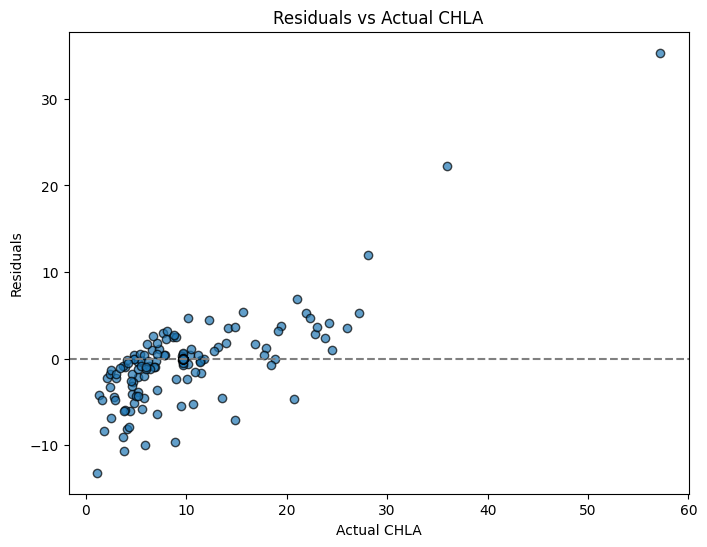

In [111]:
# Residuals Analysis
residuals = y_test_chla - y_pred_chla

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test_chla, residuals, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Actual CHLA')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual CHLA')
plt.show()

# Model Training with In-situ measurments and Satellite data


In [133]:
!apt install gdal-bin python3-gdal
!pip install GDAL

from osgeo import gdal

def gdal_raster_extract(gdf, raster_path, band_name="Band1"):
    """
    Use GDAL for faster raster value extraction.
    """
    dataset = gdal.Open(raster_path)
    band = dataset.GetRasterBand(1)
    transform = dataset.GetGeoTransform()

    def get_value(x, y):
        # Convert geographic coordinates to pixel indices
        px = int((x - transform[0]) / transform[1])
        py = int((y - transform[3]) / transform[5])
        if 0 <= px < dataset.RasterXSize and 0 <= py < dataset.RasterYSize:
            return band.ReadAsArray(px, py, 1, 1)[0, 0]
        return None

    gdf[band_name] = gdf['geometry'].apply(lambda geom: get_value(geom.x, geom.y))
    return gdf

# Example: Process Band 1 using GDAL
band1_file = '/content/drive/MyDrive/tiff/2022_04_B1.TIF'
combined_gdf = gdal_raster_extract(combined_gdf, band1_file, band_name="Band1")

# Handle missing values
combined_gdf['Band1'] = combined_gdf['Band1'].fillna(0)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.6.4+dfsg-1~jammy0).
python3-gdal is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [130]:
# bands 2-7
raster_paths = {
    'Band2': '/content/drive/MyDrive/tiff/2021_12_B2.TIF',
    'Band3': '/content/drive/MyDrive/tiff/2022_07_B3.TIF',
    'Band4': '/content/drive/MyDrive/tiff/2021_11_B4.TIF',
    'Band5': '/content/drive/MyDrive/tiff/2022_12_B5.TIF',
    'Band6': '/content/drive/MyDrive/tiff/2021_04_B6.TIF',
    'Band7': '/content/drive/MyDrive/tiff/2021_08_B7.TIF',
}

from osgeo import gdal

def gdal_raster_extract_multiple(gdf, raster_paths):
    """
    Extract raster values from multiple bands and add them as columns to the GeoDataFrame.

    Parameters:
    - gdf: GeoDataFrame with a 'geometry' column.
    - raster_paths: Dictionary where keys are band names and values are file paths to raster files.

    Returns:
    - gdf: Updated GeoDataFrame with new columns for each band.
    """
    for band_name, raster_path in raster_paths.items():
        print(f"Processing {band_name}...")
        dataset = gdal.Open(raster_path)
        band = dataset.GetRasterBand(1)
        transform = dataset.GetGeoTransform()

        # Function to extract raster value at a single point
        def get_value(x, y):
            px = int((x - transform[0]) / transform[1])
            py = int((y - transform[3]) / transform[5])
            if 0 <= px < dataset.RasterXSize and 0 <= py < dataset.RasterYSize:
                return band.ReadAsArray(px, py, 1, 1)[0, 0]
            return None

        # Apply the extraction function to each geometry
        gdf[band_name] = gdf['geometry'].apply(lambda geom: get_value(geom.x, geom.y))

        # Handle missing values
        gdf[band_name] = gdf[band_name].fillna(0)  # Replace None with 0 or another placeholder
    return gdf

# Extract values for Bands 2–7 and add them to the GeoDataFrame
combined_gdf = gdal_raster_extract_multiple(combined_gdf, raster_paths)

# Verify the updated GeoDataFrame
print(combined_gdf[['Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7']].head())

Processing Band2...
Processing Band3...
Processing Band4...
Processing Band5...
Processing Band6...
Processing Band7...
    Band2  Band3   Band4  Band5  Band6  Band7
0  7920.0    0.0  8487.0    0.0    0.0    0.0
1  7718.0    0.0  8957.0    0.0    0.0    0.0
2  7920.0    0.0  8487.0    0.0    0.0    0.0
3  7718.0    0.0  8957.0    0.0    0.0    0.0
4  7920.0    0.0  8487.0    0.0    0.0    0.0


In [131]:
print(combined_gdf[['Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7']].describe())

             Band2         Band3        Band4         Band5        Band6  \
count  1582.000000   1582.000000  1582.000000   1582.000000  1582.000000   
mean   4781.761694   4173.004425  4792.130847   3572.419722   800.646018   
std    3834.282863   4367.740010  3846.832413   3752.059075  2533.524896   
min       0.000000      0.000000     0.000000      0.000000     0.000000   
25%       0.000000      0.000000     0.000000      0.000000     0.000000   
50%    7500.000000      0.000000  7474.000000      0.000000     0.000000   
75%    7926.000000   8667.000000  7836.000000   7215.000000     0.000000   
max    8675.000000  10607.000000  8957.000000  10249.000000  9901.000000   

             Band7  
count  1582.000000  
mean   3669.481037  
std    3844.001692  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%    7452.000000  
max    9852.000000  


In [147]:
# Select only the desired parameters
parameters_of_interest = ['CHLA', 'KD', 'TN', 'TP', 'TURB_NTU', 'DO', 'PH', 'WTEMP', 'Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7']
combined_gdf = combined_gdf[['CBSeg2003', 'EventId', 'Station', 'SampleDate', 'SampleTime',
                             'Latitude', 'Longitude', 'geometry'] + parameters_of_interest]

# Handle missing values
combined_gdf[parameters_of_interest] = combined_gdf[parameters_of_interest].fillna(0)

# Display the updated DataFrame
print(combined_gdf.head())

  CBSeg2003   EventId Station SampleDate SampleTime  Latitude  Longitude  \
0    CB1TF   588001.0   CB1.1 2021-01-13   11:37:00  39.54794  -76.08481   
1    CB1TF   588002.0   CB2.1 2021-01-13   11:00:00  39.44149  -76.02599   
2    CB1TF   588015.0   CB1.1 2021-04-07   11:23:00  39.54794  -76.08481   
3    CB1TF   588016.0   CB2.1 2021-04-07   10:46:00  39.44149  -76.02599   
4    CB1TF   588037.0   CB1.1 2021-05-12   11:18:00  39.54794  -76.08481   

                         geometry    CHLA      KD  ...         DO        PH  \
0  POINT (406792.147 4378146.808)   0.737  1.4486  ...  13.600000  7.916667   
1  POINT (411711.555 4366273.282)   0.844  2.5747  ...  13.185714  7.800000   
2  POINT (406792.147 4378146.808)  10.235  1.2451  ...  11.520000  7.900000   
3  POINT (411711.555 4366273.282)  10.502  2.7440  ...  11.766667  8.216667   
4  POINT (406792.147 4378146.808)  13.617  2.4342  ...  10.880000  7.800000   

       WTEMP  Band1   Band2  Band3   Band4  Band5  Band6  Band7  
0 

In [139]:
# Define predictors and target variable
predictors = ['Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7', 'DO', 'PH', 'TN', 'TP', 'WTEMP', 'TURB_NTU', 'KD']
target = 'CHLA'  # Chlorophyll-a as the target variable


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract predictors (X) and target (y)
X = combined_gdf[predictors]
y = combined_gdf[target]

# Handle missing values (if needed)
X = X.fillna(0)  # Replace NaNs with 0 or use another strategy
y = y.fillna(0)

# Normalize predictors
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [141]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Random Forest Regression Performance:
MAE: 1.2161
RMSE: 3.1372
R²: 0.7945


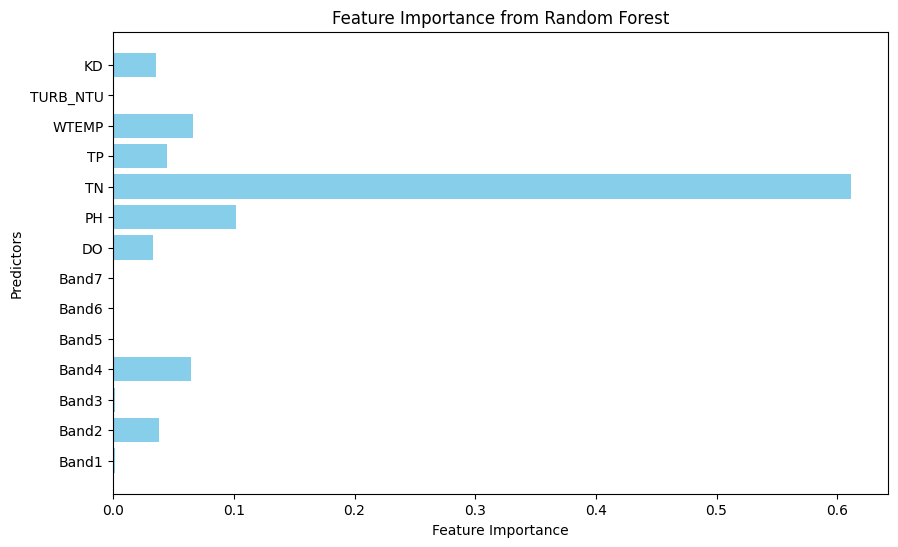

In [143]:
# Get feature importances
importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(predictors, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Predictors')
plt.title('Feature Importance from Random Forest')
plt.show()

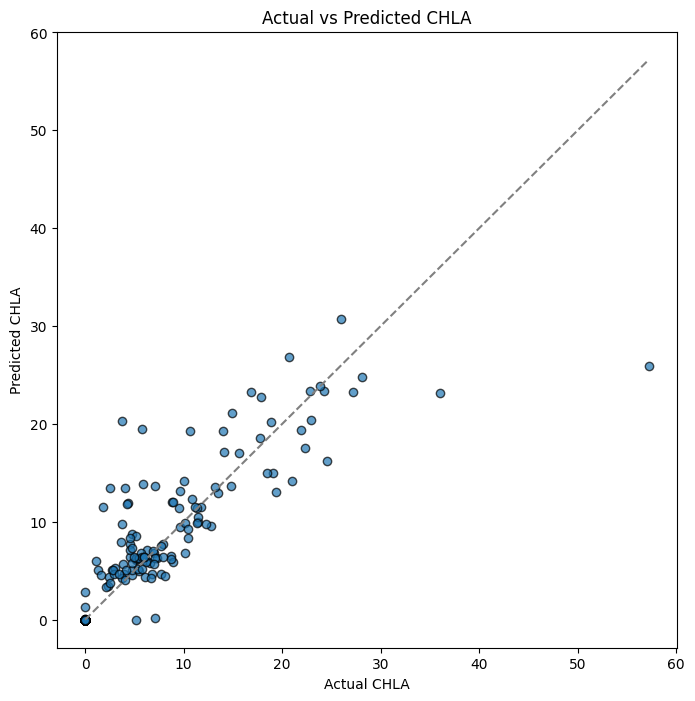

In [148]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel('Actual CHLA')
plt.ylabel('Predicted CHLA')
plt.title('Actual vs Predicted CHLA')
plt.show()

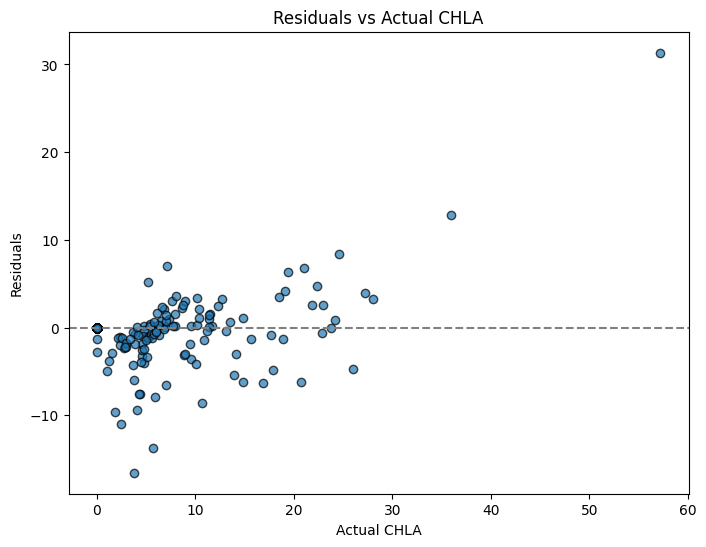

In [145]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Actual CHLA')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual CHLA')
plt.show()

# Geo Plots

In [75]:
# Step 1: Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    reshaped_data,
    geometry=gpd.points_from_xy(reshaped_data['Longitude'], reshaped_data['Latitude']),
    crs="EPSG:4326"  # Set CRS to WGS84 (latitude/longitude)
)

# Remove duplicate geometries
gdf = gdf.drop_duplicates(subset=['geometry'])

# Step 2: Inspect GeoDataFrame
print(gdf.head())  # Check the first few rows to confirm structure
print(gdf.crs)     # Confirm the CRS is correctly set


   CBSeg2003   EventId      Station SampleDate SampleTime  Latitude  \
0     CB1TF   588001.0        CB1.1 2021-01-13   11:37:00  39.54794   
1     CB1TF   588002.0        CB2.1 2021-01-13   11:00:00  39.44149   
57    CB2OH   588003.0        CB2.2 2021-01-13   10:15:00  39.34873   
58    CB2OH   588004.0        CB3.1 2021-01-13    9:29:00  39.24950   
93    CB2OH   612126.0  MDE.0103013 2021-04-14    9:05:00  39.38261   

    Longitude                    geometry      CHLA         DO        KD  \
0   -76.08481  POINT (-76.08481 39.54794)  0.737000  13.600000  1.448600   
1   -76.02599  POINT (-76.02599 39.44149)  0.844000  13.185714  2.574700   
57  -76.17579  POINT (-76.17579 39.34873)  0.656200  11.966667  3.099800   
58  -76.24050    POINT (-76.2405 39.2495)  1.344000  10.657143  2.789700   
93  -76.06811  POINT (-76.06811 39.38261)  9.634293   9.320000  0.642338   

          PH        TN        TP  TURB_NTU      WTEMP  
0   7.916667  1.858800  0.024400    283.42   2.966667  
1   

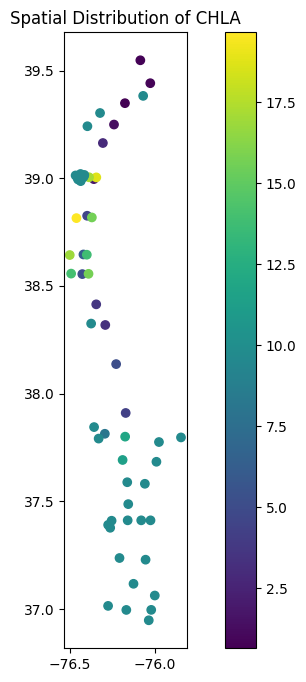

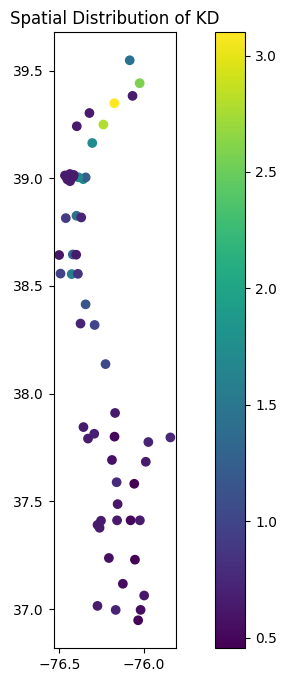

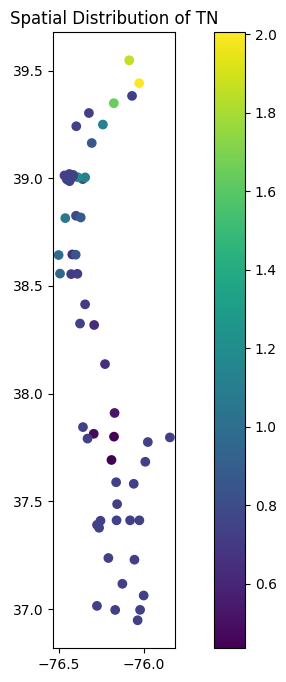

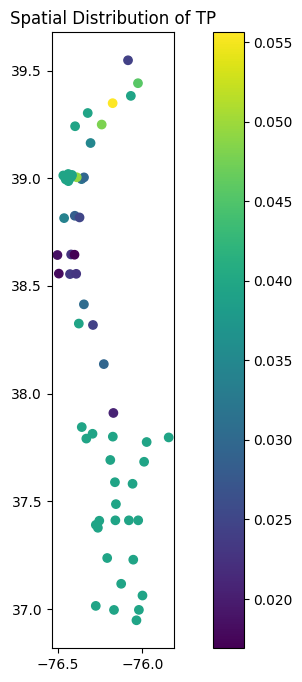

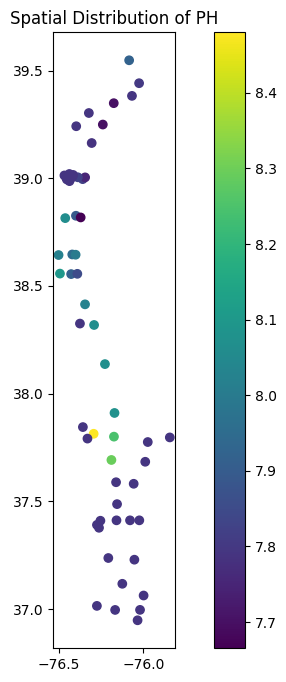

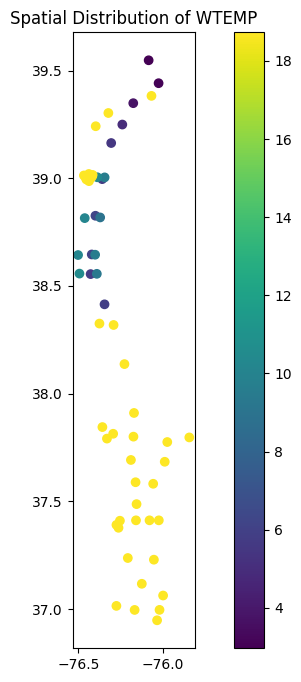

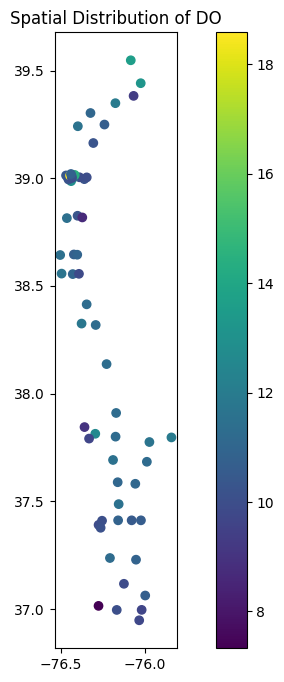

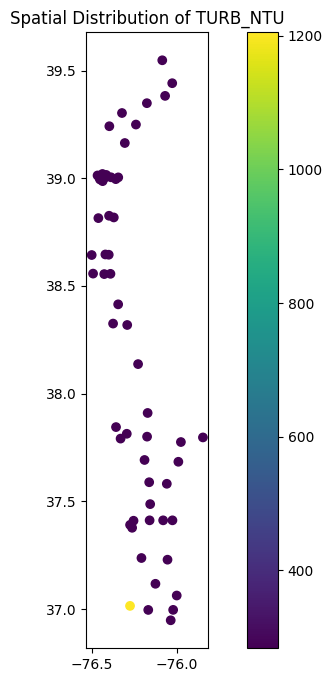

In [80]:
# List of parameters to plot
parameters = ['CHLA', 'KD', 'TN', 'TP', 'PH', 'WTEMP', 'DO', 'TURB_NTU']

# Loop through each parameter and plot its spatial distribution
for param in parameters:
    gdf.plot(column=param, cmap='viridis', legend=True, figsize=(10, 8))
    plt.title(f'Spatial Distribution of {param}')
    plt.show()